In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("11-iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


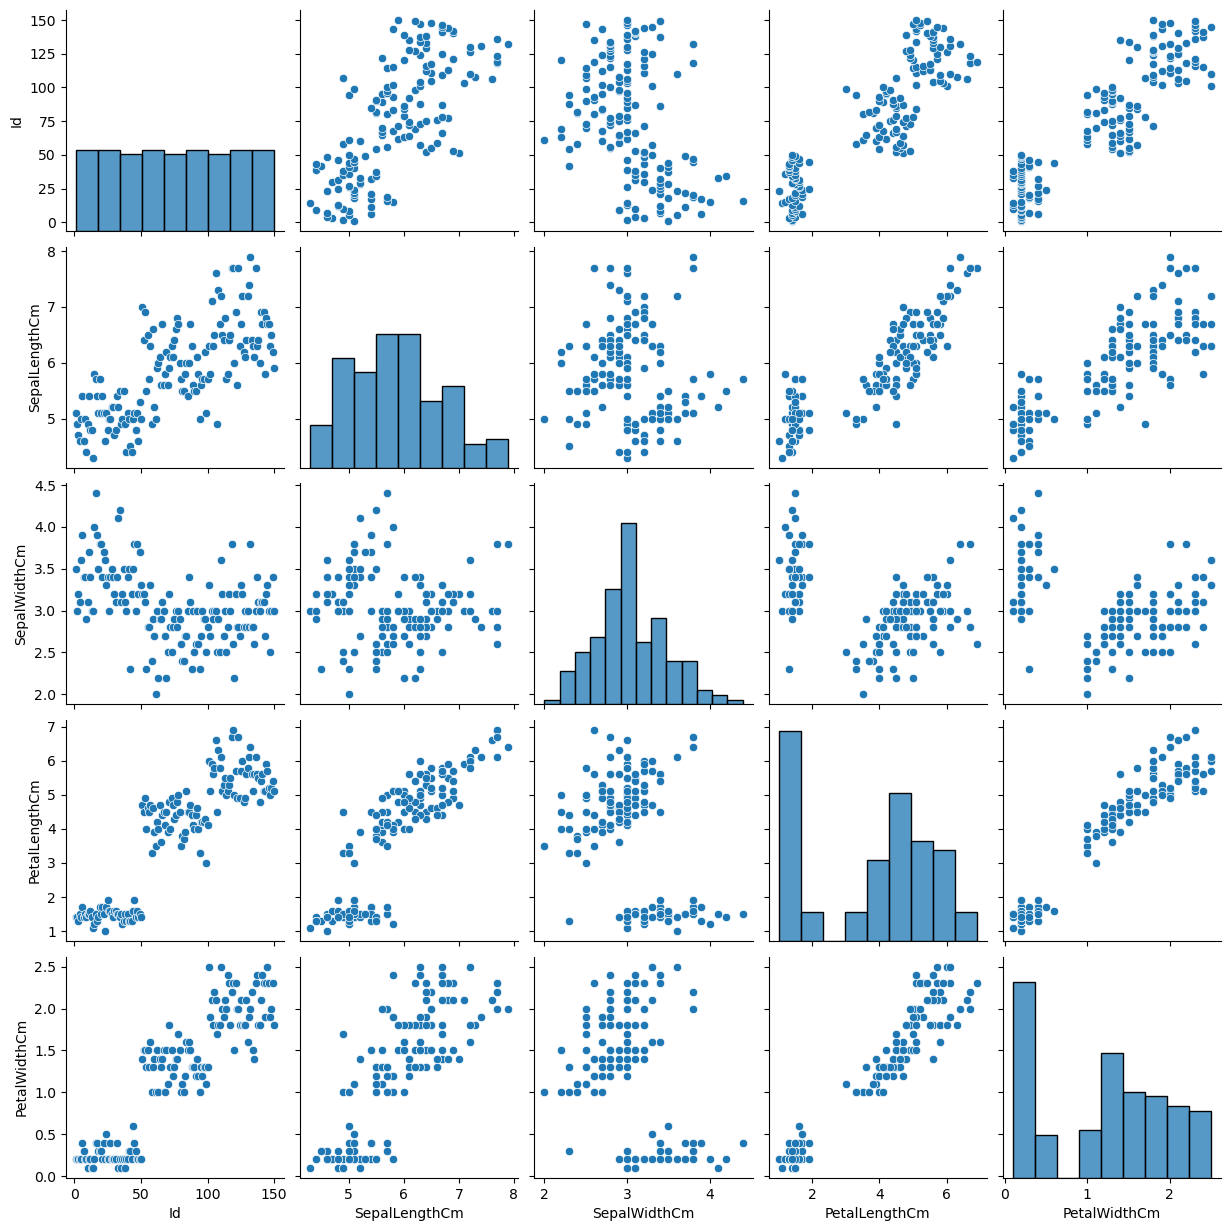

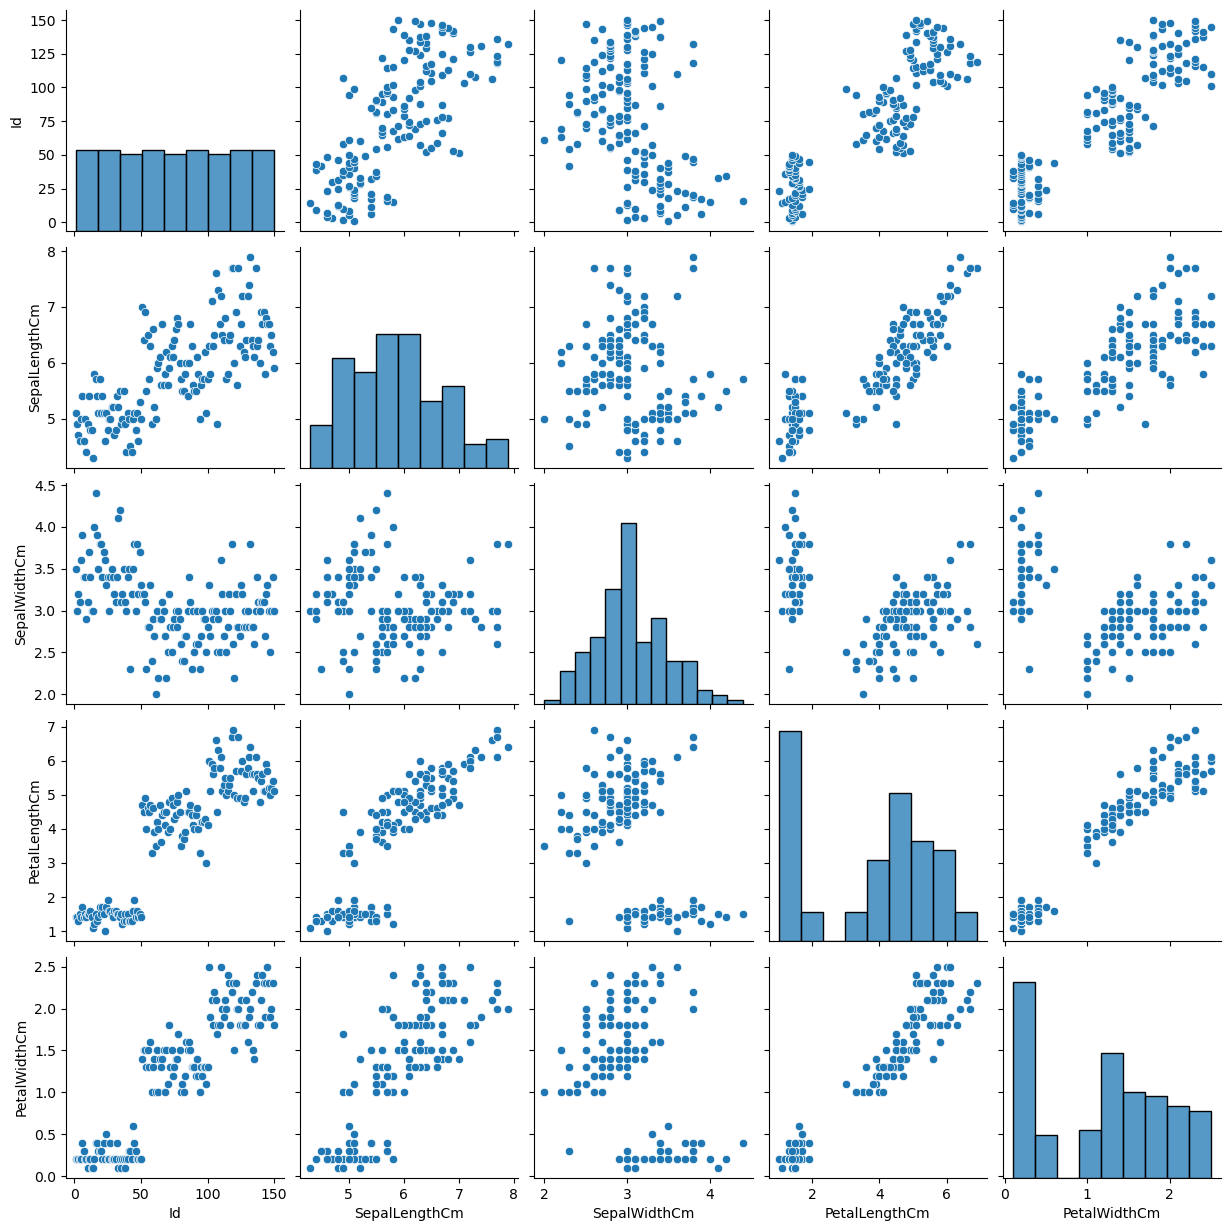

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.drop("Id",axis=1,inplace=True)

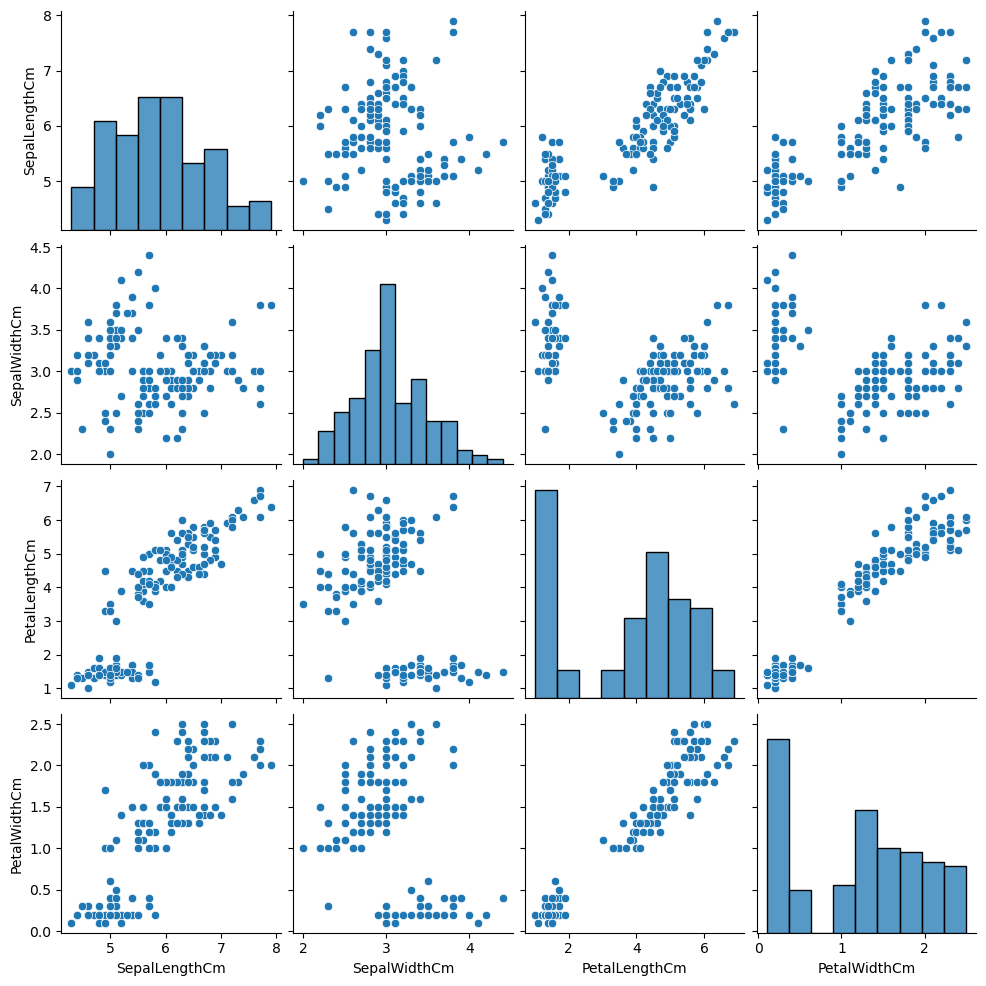

In [10]:
sns.pairplot(df)
plt.show()

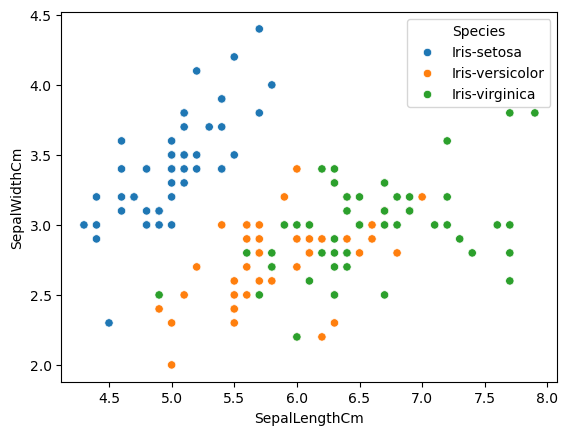

In [11]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"],hue=df["Species"])
plt.show()

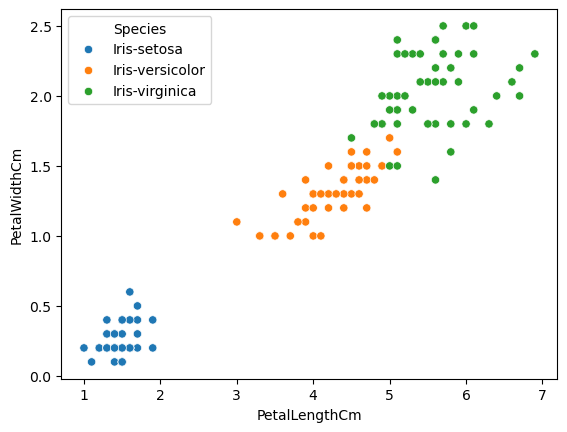

In [12]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"],hue=df["Species"])
plt.show()

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [20]:
X = df.drop("Species",axis=1)
y =  df["Species"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [21]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
21,5.1,3.7,1.5,0.4
58,6.6,2.9,4.6,1.3
130,7.4,2.8,6.1,1.9
13,4.3,3.0,1.1,0.1
11,4.8,3.4,1.6,0.2


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Naive Bayes 

In [24]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gnb = GaussianNB()

In [31]:
gnb.fit(X_train_scaled,y_train)
y_pred =  gnb.predict(X_test_scaled)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [41]:
print("confisuon metrix : \n", confusion_matrix(y_pred,y_test))
print("accuracy_score:", accuracy_score(y_pred,y_test))
print("classification_report :", classification_report(y_pred,y_test))

confisuon metrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy_score: 1.0
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [42]:
# SVC 

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC()

In [45]:
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
print("confisuon metrix : \n", confusion_matrix(y_pred,y_test))
print("accuracy_score :", accuracy_score(y_pred,y_test))
print("classification_report :", classification_report(y_pred,y_test))

confisuon metrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [46]:
# hyperparameter tuning 

In [70]:
param_grid = {
    "C": [0.1,1,10,100,1000],
    "kernel": ["linear","poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

In [71]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [72]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [73]:
y_pred = grid.predict(X_test_scaled)
print("confisuon metrix : \n", confusion_matrix(y_pred,y_test))
print("accuracy_score :", accuracy_score(y_pred,y_test))
print("classification_report :", classification_report(y_pred,y_test))

confisuon metrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [74]:
# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)
y_pred = logistic.predict(X_test_scaled)

In [77]:
logistic

LogisticRegression()

In [78]:
print("confisuon metrix : \n", confusion_matrix(y_pred,y_test))
print("accuracy_score :", accuracy_score(y_pred,y_test))
print("classification_report :", classification_report(y_pred,y_test))

confisuon metrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [79]:
param_grid = {
    "C": [0.1,1,10,100,1000],
    "penalty": ["l1","l2", "elasticnet"],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [80]:
from sklearn.model_selection import StratifiedKFold

In [81]:
import warnings
warnings.filterwarnings("ignore")
cv = StratifiedKFold()
grid2 = GridSearchCV(estimator=logistic,param_grid=param_grid,cv=cv,scoring="accuracy",n_jobs=-1)
grid2.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [82]:
grid2.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [84]:
y_pred = grid2.predict(X_test_scaled)
print("confisuon metrix : \n", confusion_matrix(y_pred,y_test))
print("accuracy_score :", accuracy_score(y_pred,y_test))
print("classification_report :", classification_report(y_pred,y_test))

confisuon metrix : 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

